### Setup

In [1]:
# magic reload
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')
from analysis.analysis_utils import *
from analysis.plot_utils import *
from datasets import load_dataset
all_df = prepare_df()

/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/../analysis/analysis_utils.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(aligned_dfs, ignore_index=True)
/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/../analysis/analysis_utils.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(aligned_dfs, ignore_index=True)


In [2]:
all_df = prepare_df()

/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/../analysis/analysis_utils.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(aligned_dfs, ignore_index=True)
/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/../analysis/analysis_utils.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(aligned_dfs, ignore_index=True)


In [3]:
mmlu_dataset = load_dataset('TIGER-Lab/MMLU-Pro')['test']

mmlu_df = all_df[all_df['config_dataset_name_debates'] == 'TIGER-Lab/MMLU-Pro'].copy()
category_map = {}
for idx in range(len(mmlu_dataset)):
    category_map[idx] = mmlu_dataset[idx].get('category', None)
mmlu_df['category'] = mmlu_df['question_idx_debates'].map(category_map)

(<module 'matplotlib.pyplot' from '/Users/joshlevy/.pyenv/versions/3.11.13/envs/llm_judge_debate_NEW_env/lib/python3.11/site-packages/matplotlib/pyplot.py'>,
 <Axes: xlabel='Judge Model', ylabel='Gain'>,
 <Axes: xlabel='Judge Model', ylabel='Gap'>)

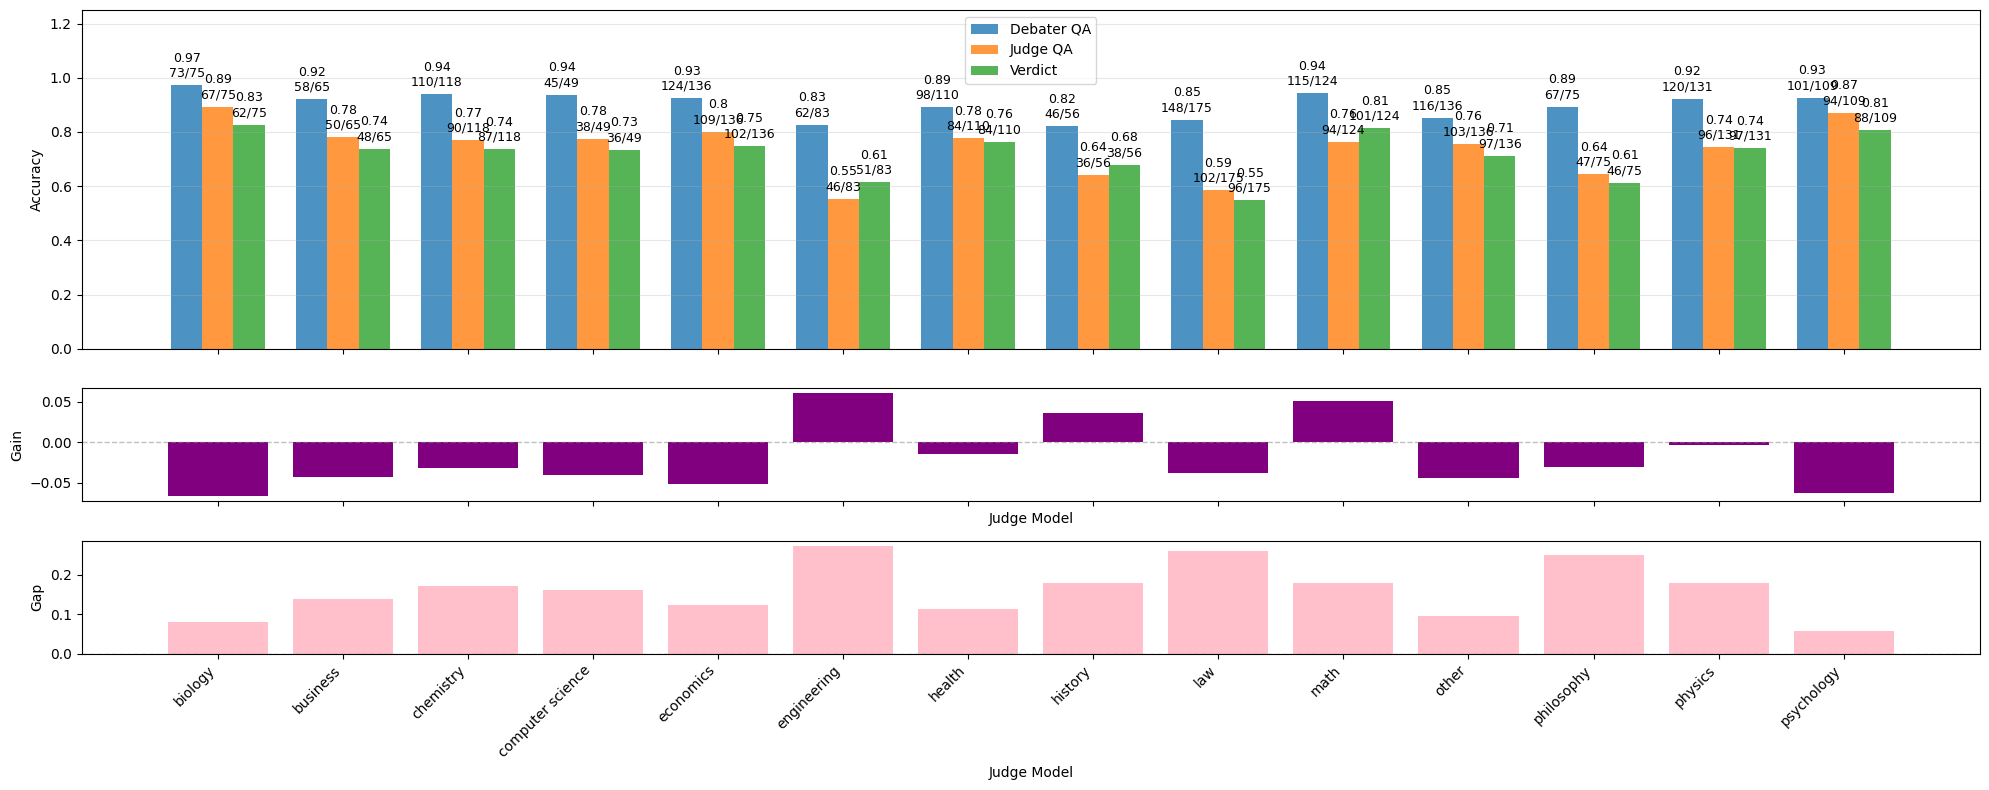

In [9]:
# mmlu_verdict_run_ids = ['4nay3cp', '07e1puy', 'ntxteqy', '9amuk8w']
verdict_run_id = 'ntxteqy'

acc_df = aggregate_by_fields(mmlu_df[mmlu_df['verdict_run_id_verdicts'] == verdict_run_id], ['category'])

plot_results_by_name(acc_df, field='category')

In [21]:
# Get 10 incorrect result (both qa and debate incorrect)
temp_df = mmlu_df[mmlu_df['verdict_run_id_verdicts'] == verdict_run_id]
temp_df = temp_df[(temp_df['is_correct_qa_debater'] == True) & (temp_df['is_correct_qa_judge'] == False) & (temp_df['is_correct_verdict'] == False)]
temp_df['category'].value_counts()

category
law                 35
philosophy          14
economics           13
engineering         13
physics             12
chemistry           10
other                9
math                 9
health               7
psychology           4
history              3
business             3
biology              3
computer science     2
Name: count, dtype: int64

In [25]:
temp_df[temp_df['category'] == 'law']['question_idx_debates'].astype(int).tolist()[:10]

[1535, 1320, 1193, 1040, 1200, 1869, 1638, 1127, 1496, 1330]

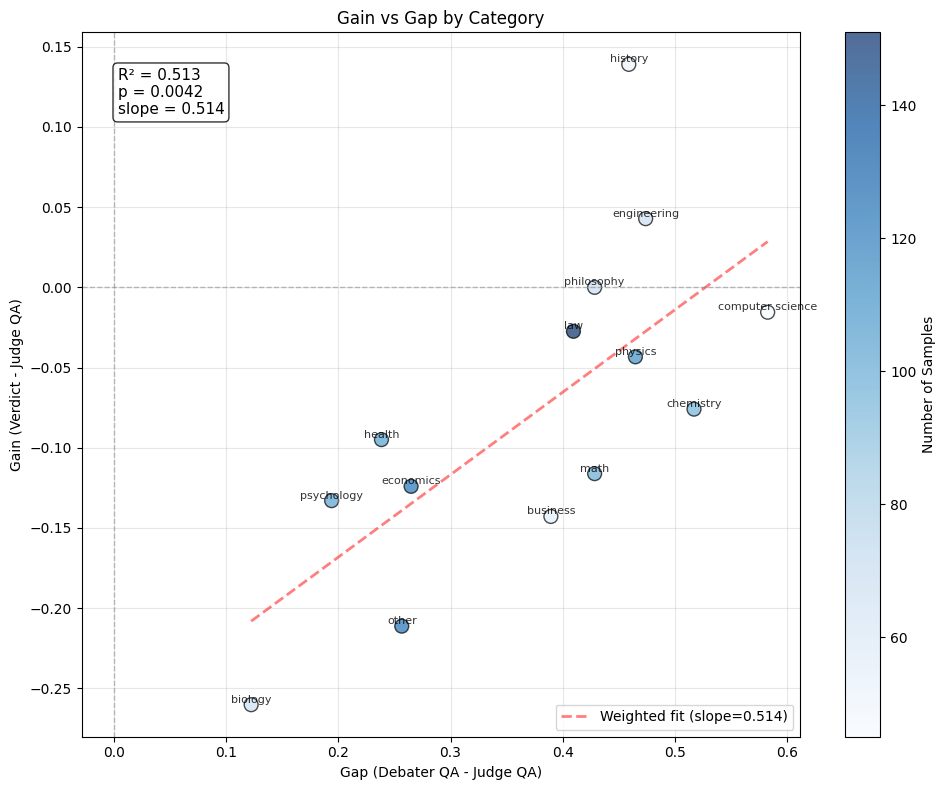

In [5]:
plot_gain_over_gap(acc_df, xfield='gap', yfield='gain')